## Breast Cancer Dataset

In [1]:
#Import and install the libraries needed for model development
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer,classification_report, recall_score, roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
#Replacing the space from column names and changing M - 1 and B - 0 
df = pd.read_csv('wdbc.csv', header = 0)
df.columns = df.columns.str.replace(' ', '')

def diagnose(x):
    if x == 'M':
        x = 1
    else:
        x = 0
    return x

In [3]:
df['target'] = df['target'].apply(lambda x :diagnose(x))

In [4]:
#Check for null values 
df.isnull().sum()

id                             0
target                         0
mean_radius                    0
mean_texture                   0
mean_perimeter                 0
mean_area                      0
mean_smoothness                0
mean_compactness               0
mean_concavity                 0
mean_concave_points            0
mean_symmetry                  0
mean_fractal_dimension         0
std_error_radius               0
std_error_texture              0
std_error_perimeter            0
std_error_area                 0
std_error_smoothness           0
std_error_compactness          0
std_error_concavity            0
std_error_concave_points       0
std_error_symmetry             0
std_error_fractal_dimension    0
worst_radius                   0
worst_texture                  0
worst_perimeter                0
worst_area                     0
worst_smoothness               0
worst_compactness              0
worst_concavity                0
worst_concave_points           0
worst_symm

In [5]:
#Get the summary of dataframe
df.describe()

,id,target,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#Extracting the independent and target variables
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [7]:
#Print first 5 rows for independent variables
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#Print first 5 for dependent variables
y.head()
y.unique()

array([1, 0], dtype=int64)

In [9]:
#Splitting the data set into training and testing data in 4:1 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Min-Max Scaling is done to avoid dominance of particular variables on the prediction 

In [10]:
#Using normalisation
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Nested Cross Validation For Model Selection 

### With Recall as the performance evaluation metric 

In [11]:
scoring = 'recall'
dt_cv_score = []
knn_cv_score = []
log_cv_score = []
svc_cv_score = []

N_TRIALS = 10
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    dt = DecisionTreeClassifier(random_state=42)
    dt_grid = {'max_depth':list(range(0,10)),'min_samples_leaf':[2, 3, 4], 'min_samples_split':[10, 20, 30], 
                 'criterion':['entropy','gini']}

    knn = KNeighborsClassifier()
    knn_grid = {'n_neighbors':list(range(2,8)), 'p':[1,2,3], 'weights':['uniform','distance']}
    
    log = LogisticRegression(random_state=42, multi_class = 'multinomial')
    lr_grid = {'C': [0.001, 0.01, 0.05, 0.1,0.05, 1, 10, 100], 'penalty' : ['l1','l2'],'solver': ['lbfgs','liblinear','sag','saga','newton-cg']}

    svc = SVC(random_state = 42, probability=True)
    svc_grid = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = inner_cv, scoring = 'recall')
    knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, cv = inner_cv, scoring = 'recall')
    svc_clf = GridSearchCV(estimator = svc, param_grid = svc_grid, cv=inner_cv, scoring = 'recall')
    lr_clf = GridSearchCV(estimator = log, param_grid = lr_grid, cv = inner_cv, scoring = 'recall')
    
    dt_score=cross_val_score(dt_clf,X_train,y_train, cv = outer_cv)
    dt_score = dt_score.mean()
    dt_cv_score.append(dt_score.mean())    

    knn_score=cross_val_score(knn_clf,X_train,y_train, cv = outer_cv)
    knn_score = knn_score.mean()
    knn_cv_score.append(knn_score.mean())    
   
    lr_score=cross_val_score(lr_clf,X_train,y_train, cv = outer_cv)
    lr_score = lr_score.mean()
    log_cv_score.append(lr_score.mean())
        
    svc_score=cross_val_score(svc_clf,X_train,y_train, cv = outer_cv)
    svc_score = svc_score.mean()
    svc_cv_score.append(svc_score.mean())
        
# print("Mean accuracy for training data set with cross validations for decision tree:",dt_cv_score)
# print("Mean accuracy for training data set with cross validations for KNN:",knn_cv_score)
# print("Mean accuracy for training data set with cross validations for logistic regression:",log_cv_score)
# print("Mean accuracy for training data set with cross validations for SVM:",svc_cv_score)

In [12]:
#Assign a function to calculate the mean of the accuracies 
def Average(lst):
    return sum(lst) / len(lst)

In [13]:
dt_avg = Average(dt_cv_score)
knn_avg = Average(knn_cv_score)
log_avg = Average(log_cv_score)
svc_avg = Average(svc_cv_score)

print("Decision Tree Recall:",dt_avg)
print("KNN Classifier Recall: ",knn_avg)
print("LOgistic Regression: ",log_avg)
print("Support Vector Machine Classifier: ",svc_avg)

Decision Tree Recall: 0.9202306412583182
KNN Classifier Recall:  0.949627192982456
LOgistic Regression:  0.9549236237144585
Support Vector Machine Classifier:  0.9471937386569873


From the Nested Cross Validation results, it is observed that Logistic Regression performs the best out of all 4 models on "recall" as the scoring metric. 

## Hyper-Parameter Tuning for Logistic Regression Model 

In [14]:
log = LogisticRegression(random_state=42)
parameters = {'C': [0.001, 0.01, 0.05, 0.1,0.05, 1, 10, 100], 'penalty' : ['l1','l2'],'solver': ['lbfgs','liblinear','sag','saga','newton-cg']}

Hyper parameter tuning for precision and recall as scoring metrics separately

In [15]:
scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(log, parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

Grid scores on development set:

nan (+/-nan) for {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.314 (+/-0.004) for {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.001, 'penalty': 'l1', 'solver': 'sag'}
0.314 (+/-0.004) for {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
0.314 (+/-0.004) for {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.833 (+/-0.011) for {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.314 (+/-0.004) for {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
0.314 (+/-0.004) for {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
0.314 (+/-0.004) for {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.314 (+/-0.004) for {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear

It is observed from above GridSearchCV hyper-parameter tuning the best parameters available for Logistic Regression are:
    {'C': 10, 'penalty': 'l1', 'solver': 'saga'}. 

Plotting the performance of Logistic Regression model on various C inputs to understand the overfitting threshold and 
selecting the best value for hyper-perameter. 

F_score for malignant class is 0.96 and f1_score for benign is 0.98 from the logistic regression model.

#### Inverse of regularization strength(C) vs Recall, f_score and AUC Score Curve

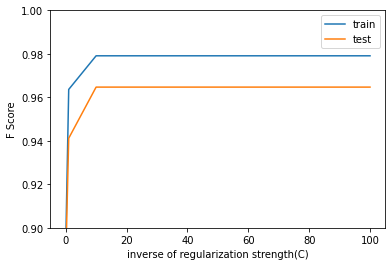

In [16]:
import matplotlib.pyplot as plt
C = [0.001, 0.01, 0.1, 1, 10, 100]
train_f_score = []
test_f_score = []
for i in C:
    clf = LogisticRegression(C=i, penalty='l1', random_state=42, solver='saga')
    clf.fit(X_train, y_train)
    train_f_score.append(f1_score(y_train, clf.predict(X_train)))
    test_f_score.append(f1_score(y_test, clf.predict(X_test)))
    #print(classification_report(y_test, clf.predict(X_test_N)))
plt.plot(C, train_f_score, label = 'train')
plt.plot(C,test_f_score, label = 'test')
plt.axis([-5,105,0.9,1])
plt.xlabel('inverse of regularization strength(C)')
plt.ylabel('F Score')
plt.legend()
plt.show()

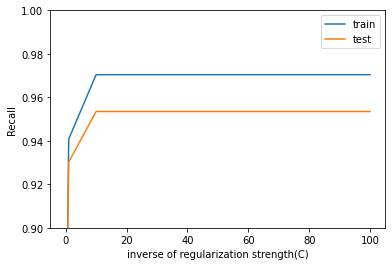

In [17]:
import matplotlib.pyplot as plt
C = [0.001, 0.01, 0.1, 1, 10, 100]
train_recall_score = []
test_recall_score = []
for i in C:
    clf = LogisticRegression(C=i, penalty='l1', random_state=42, solver='saga')
    clf.fit(X_train, y_train)
    train_recall_score.append(recall_score(y_train, clf.predict(X_train)))
    test_recall_score.append(recall_score(y_test, clf.predict(X_test)))
    #print(classification_report(y_test, clf.predict(X_test_N)))
plt.plot(C, train_recall_score, label = 'train')
plt.plot(C,test_recall_score, label = 'test')
plt.axis([-5,105,0.9,1])
plt.xlabel('inverse of regularization strength(C)')
plt.ylabel('Recall')
plt.legend()
plt.show()

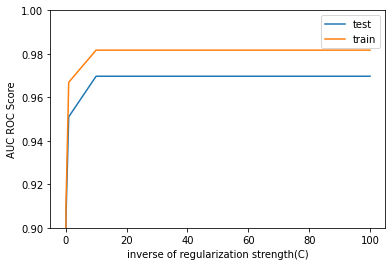

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, roc_auc_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
train_auc_score = []
test_auc_score = []
for i in C:
    clf = LogisticRegression(C=i, penalty='l1', random_state=42, solver='saga')
    clf.fit(X_train, y_train)
    train_auc_score.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc_score.append(roc_auc_score(y_test, clf.predict(X_test)))
    #print(classification_report(y_test, clf.predict(X_test_N)))
plt.plot(C, test_auc_score, label = 'test')
plt.plot(C, train_auc_score, label = 'train')
plt.xlabel('inverse of regularization strength(C)')
plt.ylabel('AUC ROC Score')
plt.axis([-5,105,0.9,1])
plt.legend()
plt.show()

From the f_score, recall and AUC curve, we can see that the model performance on testing is improving until C = 10 
beyond which there is no improvement, hence to avoid model overfitting, the C value is taken as 10. 

## Final Logistic Regression Model 

In [19]:
log_final = LogisticRegression(C=10, penalty='l1', random_state=42, solver='saga')
log_final.fit(X_train, y_train)

best_train = log_final.predict(X_train)
best_test = log_final.predict(X_test)

### Lift Curve, ROC Curve and Cumulative Gains Curve 

The AUC score is  0.9697019325253848


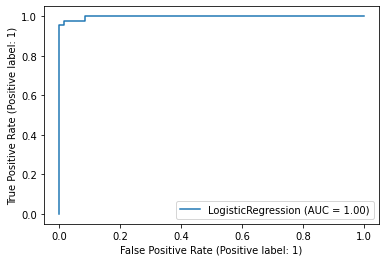

In [20]:
from sklearn.metrics import plot_roc_curve
print("The AUC score is ", roc_auc_score(y_test, log_final.predict(X_test)))
plot_roc_curve(log_final, X_test, y_test)
plt.show()

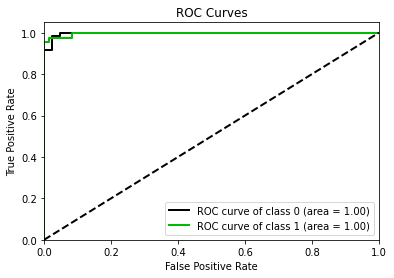

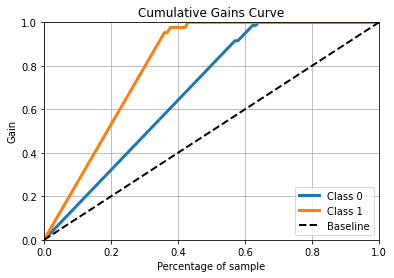

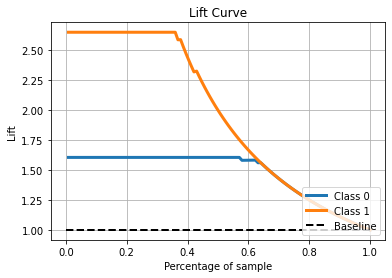

In [21]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, log_final.predict_proba(X_test), plot_micro =False, plot_macro = False)
skplt.metrics.plot_cumulative_gain(y_test, log_final.predict_proba(X_test))
skplt.metrics.plot_lift_curve(y_test, log_final.predict_proba(X_test))
plt.show()

In [22]:
roc_auc_score(y_test, log_final.predict(X_test))

0.9697019325253848

## Interpreting the ROC, AUC and Lift Curve

ROC Curve - From the ROC Curve, we obtained area under the curve value of 0.9697 which measures the probability that a randomly chosen malignant instance will have a higher predicted probability of being malignant by the model than a randomly chosen benign instance.

Lift Curve - The lift ratio indicates how better the model performs compared to a random guess.For Malignant classification (Class 1), at 30% of sample, the lift ratio is approximately 2.65 meaning that model's top 30% predictions are 2.65X as good at predicting the outcome than as random guess. For Benign classification (Class 0), at 30% of sample, the lift ratio is approximately 1.60 meaning that model's top 30% predictions are 1.60X as good at predicting the outcome than as random guess.

The training F1 Score is 0.9879518072289156
The testing F1 Score is 0.9761904761904762


--------------------------------------------------


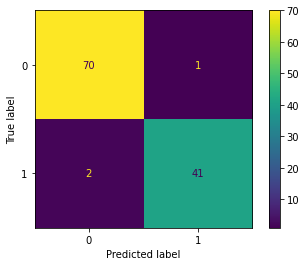

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [23]:
# Calculate the f1_score of the new model.
print('The training F1 Score is', recall_score(best_train, y_train))
print('The testing F1 Score is', recall_score(best_test, y_test))
print('\n')
print("--------------------------------------------------")

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_final, X_test, y_test)
plt.show()

print("--------------------------------------------------")
print(classification_report(y_test, log_final.predict(X_test)))

### With F_Score as Performance Evaluation Metric 

In [24]:
scorer = make_scorer(f1_score)
dt_cv_score = []
knn_cv_score = []
log_cv_score = []
svc_cv_score = []

N_TRIALS = 10
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    dt = DecisionTreeClassifier(random_state=42)
    dt_grid = {'max_depth':list(range(0,10)),'min_samples_leaf':[2, 3, 4], 'min_samples_split':[10, 20, 30], 
                 'criterion':['entropy','gini']}

    knn = KNeighborsClassifier()
    knn_grid = {'n_neighbors':list(range(2,8)), 'p':[1,2,3], 'weights':['uniform','distance']}
    
    log = LogisticRegression(random_state=42, multi_class = 'multinomial')
    lr_grid = {'C': [0.001, 0.01, 0.05, 0.1,0.05, 1, 10, 100], 'penalty' : ['l1','l2'],'solver': ['lbfgs','liblinear','sag','saga','newton-cg']}

    svc = SVC(random_state = 42, probability=True)
    svc_grid = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = inner_cv, scoring = scorer)
    knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, cv = inner_cv, scoring = scorer)
    svc_clf = GridSearchCV(estimator = svc, param_grid = svc_grid, cv=inner_cv, scoring = scorer)
    lr_clf = GridSearchCV(estimator = log, param_grid = lr_grid, cv = inner_cv, scoring = scorer)
    
    dt_score=cross_val_score(dt_clf,X_train,y_train, cv = outer_cv)
    dt_score = dt_score.mean()
    dt_cv_score.append(dt_score.mean())    

    knn_score=cross_val_score(knn_clf,X_train,y_train, cv = outer_cv)
    knn_score = knn_score.mean()
    knn_cv_score.append(knn_score.mean())    
   
    lr_score=cross_val_score(lr_clf,X_train,y_train, cv = outer_cv)
    lr_score = lr_score.mean()
    log_cv_score.append(lr_score.mean())
        
    svc_score=cross_val_score(svc_clf,X_train,y_train, cv = outer_cv)
    svc_score = svc_score.mean()
    svc_cv_score.append(svc_score.mean())
        

In [26]:
dt_avg = Average(dt_cv_score)
knn_avg = Average(knn_cv_score)
log_avg = Average(log_cv_score)
svc_avg = Average(svc_cv_score)

print("Mean f_score for training data set with cross validations for decision tree: ",dt_avg)
print("Mean f_score for training data set with cross validations for KNN: ",knn_avg)
print("Mean f_score for training data set with cross validations for logistic regression: ",log_avg)
print("Mean f_score for training data set with cross validations for SVM: ",svc_avg)

Mean f_score for training data set with cross validations for decision tree:  0.9321501574081574
Mean f_score for training data set with cross validations for KNN:  0.9679211727950012
Mean f_score for training data set with cross validations for logistic regression:  0.9657489938027636
Mean f_score for training data set with cross validations for SVM:  0.9718631611335911


#### It is observed that SVM performs the best from Nested CV results with f_score as the performance metric 

## Hyper-Parameter Tuning for SVC Classifier 

In [27]:
parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.964 (+/-0.022) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.979 (+/-0.022) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.977 (+/-0.029) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.973 (+/-0.026) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.972 (+/-0.034) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.968 (+/-0.038) for {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.966 (+/-0.035) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.962 (+/-0.017) for {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
0.980 (+/-0.009) for {'C': 1, 'kernel': 'linear'}
0.979 (+/-0.020) for {'C': 10, 'kernel': 'linear'}
0.971 (+/-0.034) for {'C': 100, 'kernel': 'linear'}
0.958 (+/-0.045) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

      

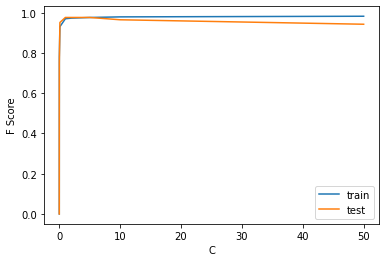

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, recall_score, f1_score
C = [0.001, 0.01, 0.1, 1,2, 5, 10, 50]
train_f_score = []
test_f_score = []
for i in C:
    clf = SVC(C=i, kernel= 'linear', random_state = 42, probability=True)
    clf.fit(X_train, y_train)
    train_f_score.append(f1_score(y_train, clf.predict(X_train)))
    test_f_score.append(f1_score(y_test, clf.predict(X_test)))
plt.plot(C, train_f_score, label = 'train')
plt.plot(C,test_f_score, label = 'test')
plt.xlabel('C')
plt.ylabel('F Score')
plt.legend()
plt.show()

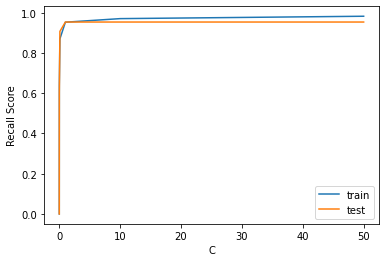

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, recall_score, f1_score
C = [0.001, 0.01, 0.1, 1, 10, 50]
train_recall_score = []
test_recall_score = []
for i in C:
    clf = SVC(C=i, kernel = 'linear', random_state = 42, probability=True)
    clf.fit(X_train, y_train)
    train_recall_score.append(recall_score(y_train, clf.predict(X_train)))
    test_recall_score.append(recall_score(y_test, clf.predict(X_test)))
plt.plot(C, train_recall_score, label = 'train')
plt.plot(C,test_recall_score, label = 'test')
plt.xlabel('C')
plt.ylabel('Recall Score')
plt.legend()
plt.show()

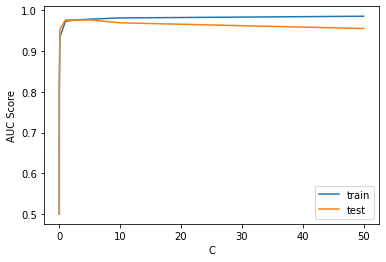

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import make_scorer, recall_score, f1_score
C = [0.001, 0.01, 0.1, 1, 2, 5, 10, 50]
train_auc_score = []
test_auc_score = []
for i in C:
    clf = SVC(C=i, kernel = 'linear', random_state = 42, probability=True)
    clf.fit(X_train, y_train)
    train_auc_score.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc_score.append(roc_auc_score(y_test, clf.predict(X_test)))
plt.plot(C, train_auc_score, label = 'train')
plt.plot(C, test_auc_score, label = 'test')
plt.xlabel('C')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

From the f_score, recall and AUC curve, we can see that the model performance on testing is improving until C = 1 
beyond which there is no improvement, hence to avoid model overfitting, the C value is taken as 1. 

In [31]:
clf_svc = SVC(C=1, kernel = 'linear', random_state = 42, probability=True)
clf_svc.fit(X_train, y_train)
best_train_predictions_new = clf_svc.predict(X_train)
print(classification_report(y_test, clf_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



F_score for malignant class is 0.95 and f1_score for benign is 1.0 for the Support Vector Machine Classifier. 

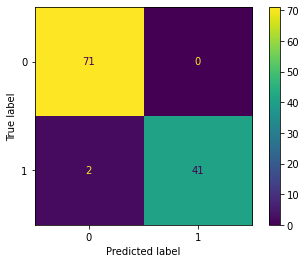

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svc, X_test, y_test)
plt.show()

The AUC score is  0.9767441860465116


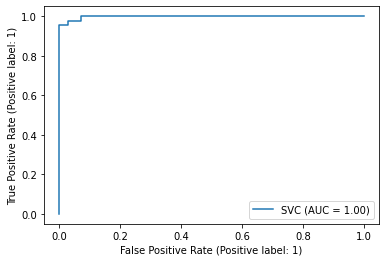

In [33]:
from sklearn.metrics import plot_roc_curve
print("The AUC score is ", roc_auc_score(y_test, clf_svc.predict(X_test)))
plot_roc_curve(clf_svc, X_test, y_test)
plt.show()


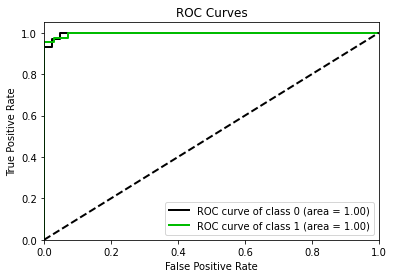

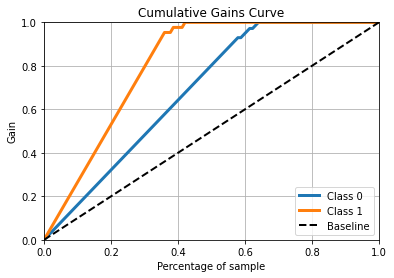

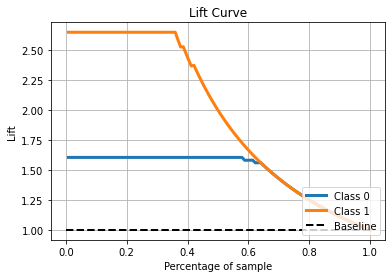

In [34]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, clf_svc.predict_proba(X_test), plot_micro =False, plot_macro = False)
skplt.metrics.plot_cumulative_gain(y_test, clf_svc.predict_proba(X_test))
skplt.metrics.plot_lift_curve(y_test, clf_svc.predict_proba(X_test))
plt.show()

In [35]:
roc_auc_score(y_test, clf_svc.predict(X_test))

0.9767441860465116

## Interpreting ROC Curve and Lift Curve 

ROC Curve - From the ROC Curve, we obtained area under the curve value of 0.9767 which measures the probability that a randomly chosen malignant instance will have a higher predicted probability of being malignant by the model than a  randomly chosen benign instance.

Lift Curve - The lift ratio indicates how better the model performs compared to a random guess.For Malignant classification (Class 1), at 30% of sample, the lift ratio is approximately 2.65 meaning that model's top 30% predictions are 2.65X as good at predicting the outcome than as random guess. For Benign classification (Class 0), at 30% of sample, the lift ratio is approximately 1.60 meaning that model's top 30% predictions are 1.60X as good at predicting the outcome than as random guess.

### Conclusion:

It has been observed from the above analysis that best model performance depends on performance evaluation metric and changing the evaluation metric also changes the best model choice. Both recall and f_score have been used seperately as performance metrics to get model choice for each of the evaluation metrics and nested cross validation was leveraged for model selection. The findings are summarized below:

    Recall as the performance Metric:
        - Logistic Regression performs the best out of all 4 models with the below results:
        
         --------------------------------------------------
                  precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43
        
        
    F_score as the performance Metric:
        - SVC performs the best out of all 4 models with the below results:
        
        --------------------------------------------------
                precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43
        